In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from community import community_louvain
import pandas as pd

# Dados de treino

In [ ]:
def measures(G):
    def momment_of_degree_distribution(G,m):
        M = 0
        N = len(G)
        for i in G.nodes:
            M = M + G.degree(i)**m
        M = M/N
        return M

    N = len(G)
    M = G.number_of_edges()
    vk = dict(G.degree())
    vk = list(vk.values())
    vk = np.array(vk)
    k1 = momment_of_degree_distribution(G,1)
    k2 = momment_of_degree_distribution(G,2)
    variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
    av_cl = nx.average_clustering(G)
    l = nx.average_shortest_path_length(G)
    r=nx.degree_assortativity_coefficient(G)

    CLC = dict(nx.closeness_centrality(G))
    CLC = list(CLC.values())
    av_clc = np.mean(CLC) # Average closeness centrality

    B = dict(nx.betweenness_centrality(G))
    B = list(B.values())
    av_B = np.mean(B) #Average betweenness centrality

    EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
    EC = list(EC.values())
    av_EC = np.mean(EC) #Average eigenvector centrality

    PR = dict(nx.pagerank(G, alpha=0.85))
    PR = list(PR.values())
    av_pr = np.mean(PR) #Average PageRank

    def modularity(G, c):
        A = nx.adjacency_matrix(G)
        N = len(G)
        M = G.number_of_edges()
        Q = 0
        for i in np.arange(0,N):
            ki = len(list(G.neighbors(i)))
            for j in np.arange(0,N):
                if(c[i]==c[j]):
                    kj = len(list(G.neighbors(j)))
                    Q = Q + A[i,j]-(ki*kj)/(2*M)
        Q = Q/(2*M)
        return Q
    communities =list(community_louvain.best_partition(G).values())
    mod_louvrain = modularity(G,communities) # modularidade usando método de Louvrain

    return  k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain

In [ ]:
cl = ['ER','WS','BA']
#ER networks
X = []
y = []
n_nets = 30
av_degree = k1
p = av_degree/(N-1)
for i in range(0,n_nets):
    GER = nx.gnp_random_graph(N, p, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(GER), key=len, reverse=True)
    GER = GER.subgraph(Gcc[0])
    GER = nx.convert_node_labels_to_integers(GER, first_label=0)
    k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(GER)
    x = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]
    X.append(x)
    y.append(0.0)

#WS networks
k = int(av_degree)
p = 0.1 #probability of rewiring
for i in range(0,n_nets):
    GWS = nx.watts_strogatz_graph(N, k, p, seed=None)
    Gcc = sorted(nx.connected_components(GWS), key=len, reverse=True)
    GWS = GWS.subgraph(Gcc[0])
    GWS = nx.convert_node_labels_to_integers(GWS, first_label=0)
    k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]
    X.append(x)
    y.append(1.0)

# BA networks
m = int(av_degree/2)
for i in range(0,n_nets):
    GBA = nx.barabasi_albert_graph(N, m)    
    Gcc = sorted(nx.connected_components(GBA), key=len, reverse=True)
    GBA = GBA.subgraph(Gcc[0])
    GBA = nx.convert_node_labels_to_integers(GBA, first_label=0)
    k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(GWS)
    x = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]
    X.append(x)
    y.append(2.0)

In [ ]:
X = np.array(X)
y = np.array(y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X,y)

from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(random_state = 37)
model2.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=37, verbose=0,
                       warm_start=False)

# Redes biológicas

## Rede 1

Number of nodes: 77
Number of edges: 254


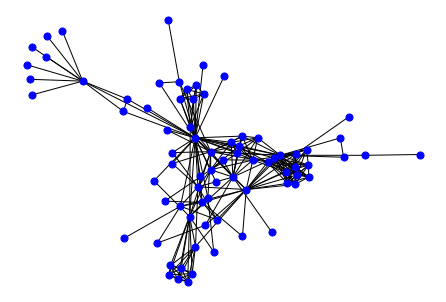

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]
print(X_net)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

[6.597402597402597, 79.53246753246754, 36.006746500252994, 0.5731367499320135, 2.6411483253588517, -0.16522513442236916, 0.3893412505666164, 0.021881977671451357, 0.07802991544392937, 0.012987012987012988, 0.5529558559117133]
Xnet: (1, 11)


In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

Classe (k-nearest neighbors): ER


In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

Classe (Random Forest): ER


## Rede 2

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]


X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

## Rede 3

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]


X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

# Redes sociais

## Rede 1

Number of nodes: 77
Number of edges: 254


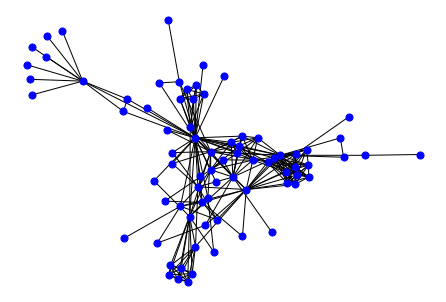

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]
print(X_net)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

[6.597402597402597, 79.53246753246754, 36.006746500252994, 0.5731367499320135, 2.6411483253588517, -0.16522513442236916, 0.3893412505666164, 0.021881977671451357, 0.07802991544392937, 0.012987012987012988, 0.5529558559117133]
Xnet: (1, 11)


In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

Classe (k-nearest neighbors): ER


In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

Classe (Random Forest): ER


## Rede 2

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]


X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

## Rede 3

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]


X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

# Redes tecnológicas

## Rede 1

Number of nodes: 77
Number of edges: 254


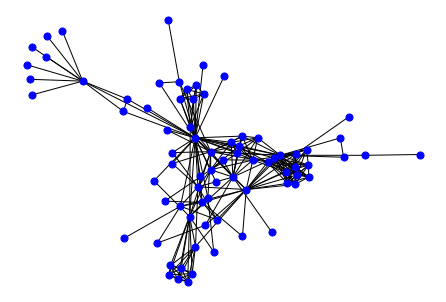

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]
print(X_net)

X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

[6.597402597402597, 79.53246753246754, 36.006746500252994, 0.5731367499320135, 2.6411483253588517, -0.16522513442236916, 0.3893412505666164, 0.021881977671451357, 0.07802991544392937, 0.012987012987012988, 0.5529558559117133]
Xnet: (1, 11)


In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

Classe (k-nearest neighbors): ER


In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

Classe (Random Forest): ER


## Rede 2

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]


X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

## Rede 3

In [ ]:
G= nx.read_edgelist('/content/drive/Shareddrives/Redes_complexas/lesmis.txt', nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

In [ ]:
k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain = measures(G)
X_net = [k1,k2,variance,av_cl,l,r, av_clc, av_B, av_EC, av_pr, mod_louvrain]


X_net = np.array(X_net)
X_net = X_net.reshape(1,len(X_net)) 
X_net = scaler.transform(X_net)
print('Xnet:', X_net.shape)

In [ ]:
y_pred = model.predict(X_net) 
print('Classe (k-nearest neighbors):', cl[int(y_pred)])

In [ ]:
y_pred = model2.predict(X_net) 
print('Classe (Random Forest):', cl[int(y_pred)])

# Atributos mais importantes

Para descobrir qual o atributo é mais importante iremos utilizar o próprio classificador Random Forest:


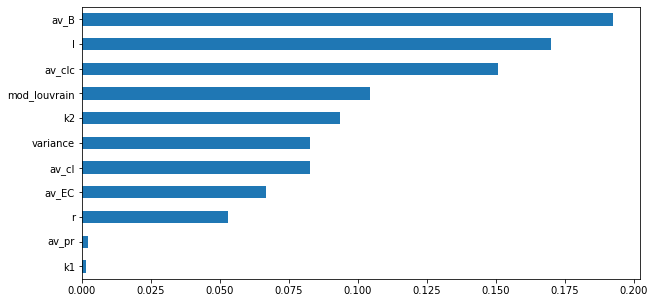

In [ ]:
X_pd = pd.DataFrame(X, columns=['k1','k2','variance','av_cl','l','r', 'av_clc', 'av_B', 
                                'av_EC', 'av_pr', 'mod_louvrain'])
y_pd = pd.DataFrame(y)

plt.figure(figsize=(10,5))
rf_model = RandomForestClassifier(random_state = 37)
rf_model.fit(X, y)

random_forest = pd.Series(rf_model.feature_importances_, index=X_pd.columns)
random_forest.sort_values().plot(kind='barh')

O Average betweenness centrality (av_B), average shortest path length (l) e Average closeness centrality (av_clc)  tiveram as maiores importância para classificação das redes, juntas correspondem a aproximadamente 50% da explicabilidade